<a href="https://colab.research.google.com/github/githubshathik/Machine_learning_Tasks/blob/shathik/Task_6_submit(Bouston_housing).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   
#Advance programming and Master data science
#Task 6 :Bouston HOusing Mevd prediction Submission
#Name:Mohamed Shathik
#Batch:D10(B)
#Dept:Data Science
#mail id:mohamedshafa17@gmail.**com**

In [87]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

In [88]:
datasets = pd.read_csv('/content/train.csv') #read the dataset
datasets 

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.95577,0.0,8.14,0,0.538,6.047,88.8,4.4534,4,307.0,21.0,306.38,17.28,14.8
1,1,0.02875,28.0,15.04,0,0.464,6.211,28.9,3.6659,4,270.0,18.2,396.33,6.21,25.0
2,2,1.22358,0.0,19.58,0,0.605,6.943,97.4,1.8773,5,403.0,14.7,363.43,4.59,41.3
3,3,5.66637,0.0,18.10,0,0.740,6.219,100.0,2.0048,24,666.0,20.2,395.69,16.59,18.4
4,4,0.04544,0.0,3.24,0,0.460,6.144,32.2,5.8736,4,430.0,16.9,368.57,9.09,19.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,0.03615,80.0,4.95,0,0.411,6.630,23.4,5.1167,4,245.0,19.2,396.90,4.70,27.9
396,396,0.17505,0.0,5.96,0,0.499,5.966,30.2,3.8473,5,279.0,19.2,393.43,10.13,24.7
397,397,6.65492,0.0,18.10,0,0.713,6.317,83.0,2.7344,24,666.0,20.2,396.90,13.99,19.5
398,398,0.13117,0.0,8.56,0,0.520,6.127,85.2,2.1224,5,384.0,20.9,387.69,14.09,20.4


In [89]:
boston = pd.DataFrame(datasets)
boston=boston.drop(columns=['ID'], axis = 1)
boston
    

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.95577,0.0,8.14,0,0.538,6.047,88.8,4.4534,4,307.0,21.0,306.38,17.28,14.8
1,0.02875,28.0,15.04,0,0.464,6.211,28.9,3.6659,4,270.0,18.2,396.33,6.21,25.0
2,1.22358,0.0,19.58,0,0.605,6.943,97.4,1.8773,5,403.0,14.7,363.43,4.59,41.3
3,5.66637,0.0,18.10,0,0.740,6.219,100.0,2.0048,24,666.0,20.2,395.69,16.59,18.4
4,0.04544,0.0,3.24,0,0.460,6.144,32.2,5.8736,4,430.0,16.9,368.57,9.09,19.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.03615,80.0,4.95,0,0.411,6.630,23.4,5.1167,4,245.0,19.2,396.90,4.70,27.9
396,0.17505,0.0,5.96,0,0.499,5.966,30.2,3.8473,5,279.0,19.2,393.43,10.13,24.7
397,6.65492,0.0,18.10,0,0.713,6.317,83.0,2.7344,24,666.0,20.2,396.90,13.99,19.5
398,0.13117,0.0,8.56,0,0.520,6.127,85.2,2.1224,5,384.0,20.9,387.69,14.09,20.4


In [90]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [91]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     400 non-null    float64
 1   ZN       400 non-null    float64
 2   INDUS    400 non-null    float64
 3   CHAS     400 non-null    int64  
 4   NOX      400 non-null    float64
 5   RM       400 non-null    float64
 6   AGE      400 non-null    float64
 7   DIS      400 non-null    float64
 8   RAD      400 non-null    int64  
 9   TAX      400 non-null    float64
 10  PTRATIO  400 non-null    float64
 11  B        400 non-null    float64
 12  LSTAT    400 non-null    float64
 13  MEDV     400 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 43.9 KB


In [92]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,3.757191,10.970000,10.936425,0.072500,0.552817,6.292165,68.086000,3.819462,9.462500,403.797500,18.459000,359.455375,12.668525,22.475750
std,9.155496,22.796261,6.848042,0.259639,0.115488,0.709923,28.386888,2.132445,8.687478,169.656816,2.148105,86.732906,7.207047,9.218611
min,0.009060,0.000000,0.460000,0.000000,0.385000,4.138000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.920000,5.000000
25%,0.077820,0.000000,5.130000,0.000000,0.449000,5.877500,42.375000,2.109150,4.000000,277.000000,17.400000,376.115000,6.990000,17.100000
50%,0.242170,0.000000,8.560000,0.000000,0.532000,6.208500,76.950000,3.272100,5.000000,329.000000,18.950000,391.575000,10.875000,21.000000
75%,3.543428,12.500000,18.100000,0.000000,0.624000,6.620500,93.825000,5.214600,24.000000,666.000000,20.200000,396.285000,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [93]:
Y = boston['MEDV'].values
X1=boston.iloc[:,:-1]
X=boston.iloc[:,:-1].values
X

array([[9.55770e-01, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.06380e+02, 1.72800e+01],
       [2.87500e-02, 2.80000e+01, 1.50400e+01, ..., 1.82000e+01,
        3.96330e+02, 6.21000e+00],
       [1.22358e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        3.63430e+02, 4.59000e+00],
       ...,
       [6.65492e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.96900e+02, 1.39900e+01],
       [1.31170e-01, 0.00000e+00, 8.56000e+00, ..., 2.09000e+01,
        3.87690e+02, 1.40900e+01],
       [6.46600e-02, 7.00000e+01, 2.24000e+00, ..., 1.48000e+01,
        3.68240e+02, 4.97000e+00]])

In [94]:
Y

array([14.8, 25. , 41.3, 18.4, 19.8, 20.6, 15. , 13.4, 23.1, 19.8, 50. ,
       22. , 21.7,  5. , 26.7,  8.3, 16.1, 20.2, 28.5, 20.8, 29.4, 24.3,
       18.1, 22.1, 24. , 39.8, 18.4, 27.1, 23.9, 24.5, 21.2, 19.2, 20. ,
       29.6, 19.1, 10.5, 28.1, 29. , 20.9, 20.6, 30.5, 22.4, 33.8, 16.6,
       28.4, 19.6, 28.2, 13.5, 17.8, 14.2,  8.4, 13.1, 15.3, 22.9, 20.6,
       14.4, 24.4, 22.4, 29.1, 19.2, 21. ,  7.4, 16.3, 21.7, 16.6, 20.3,
       18.7, 13.6, 19.5, 27.5, 22.7, 24.5, 18.9, 15. , 22.8, 50. , 24.8,
       23. , 22.8, 20.6, 13.8, 31. , 22. , 32.4, 18.5, 41.7, 30.7, 30.1,
       10.4,  8.8, 23.1, 28.7, 43.1, 23.9, 23.4, 13.1, 24.7, 16.1, 31.6,
       24.2, 26.6, 30.8, 20. , 17.6, 24.8, 30.1, 35.2, 10.4,  8.3, 22.6,
       11.5, 28.7, 33.4, 44.8, 36.5, 23.5, 13.9, 32.9, 11.8, 11.3, 11.7,
       17.1, 32. , 19.9, 21.5, 21.7, 36. , 50. , 13.8, 28. , 50. , 48.3,
       13.3, 19.8, 20.4, 12.8, 21.4, 20.7, 21.7, 19.6, 17.8, 21.4, 19.4,
       29.8, 17.8, 23.2, 15.6, 50. , 24.4, 13.3, 23

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


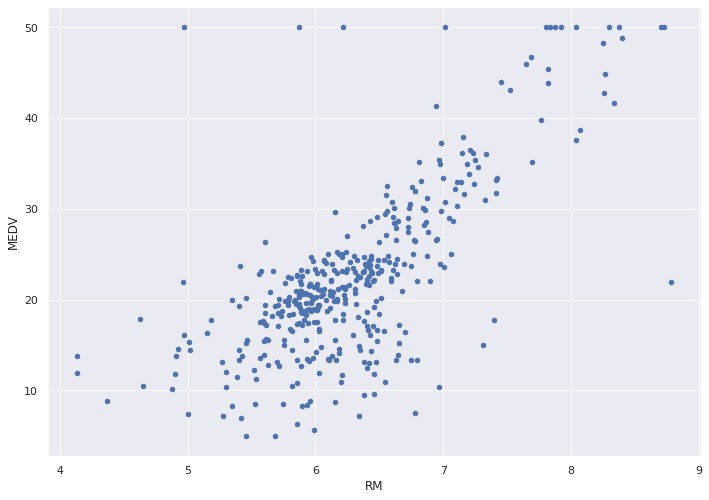

In [95]:
boston.plot.scatter('RM', 'MEDV')

In [96]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

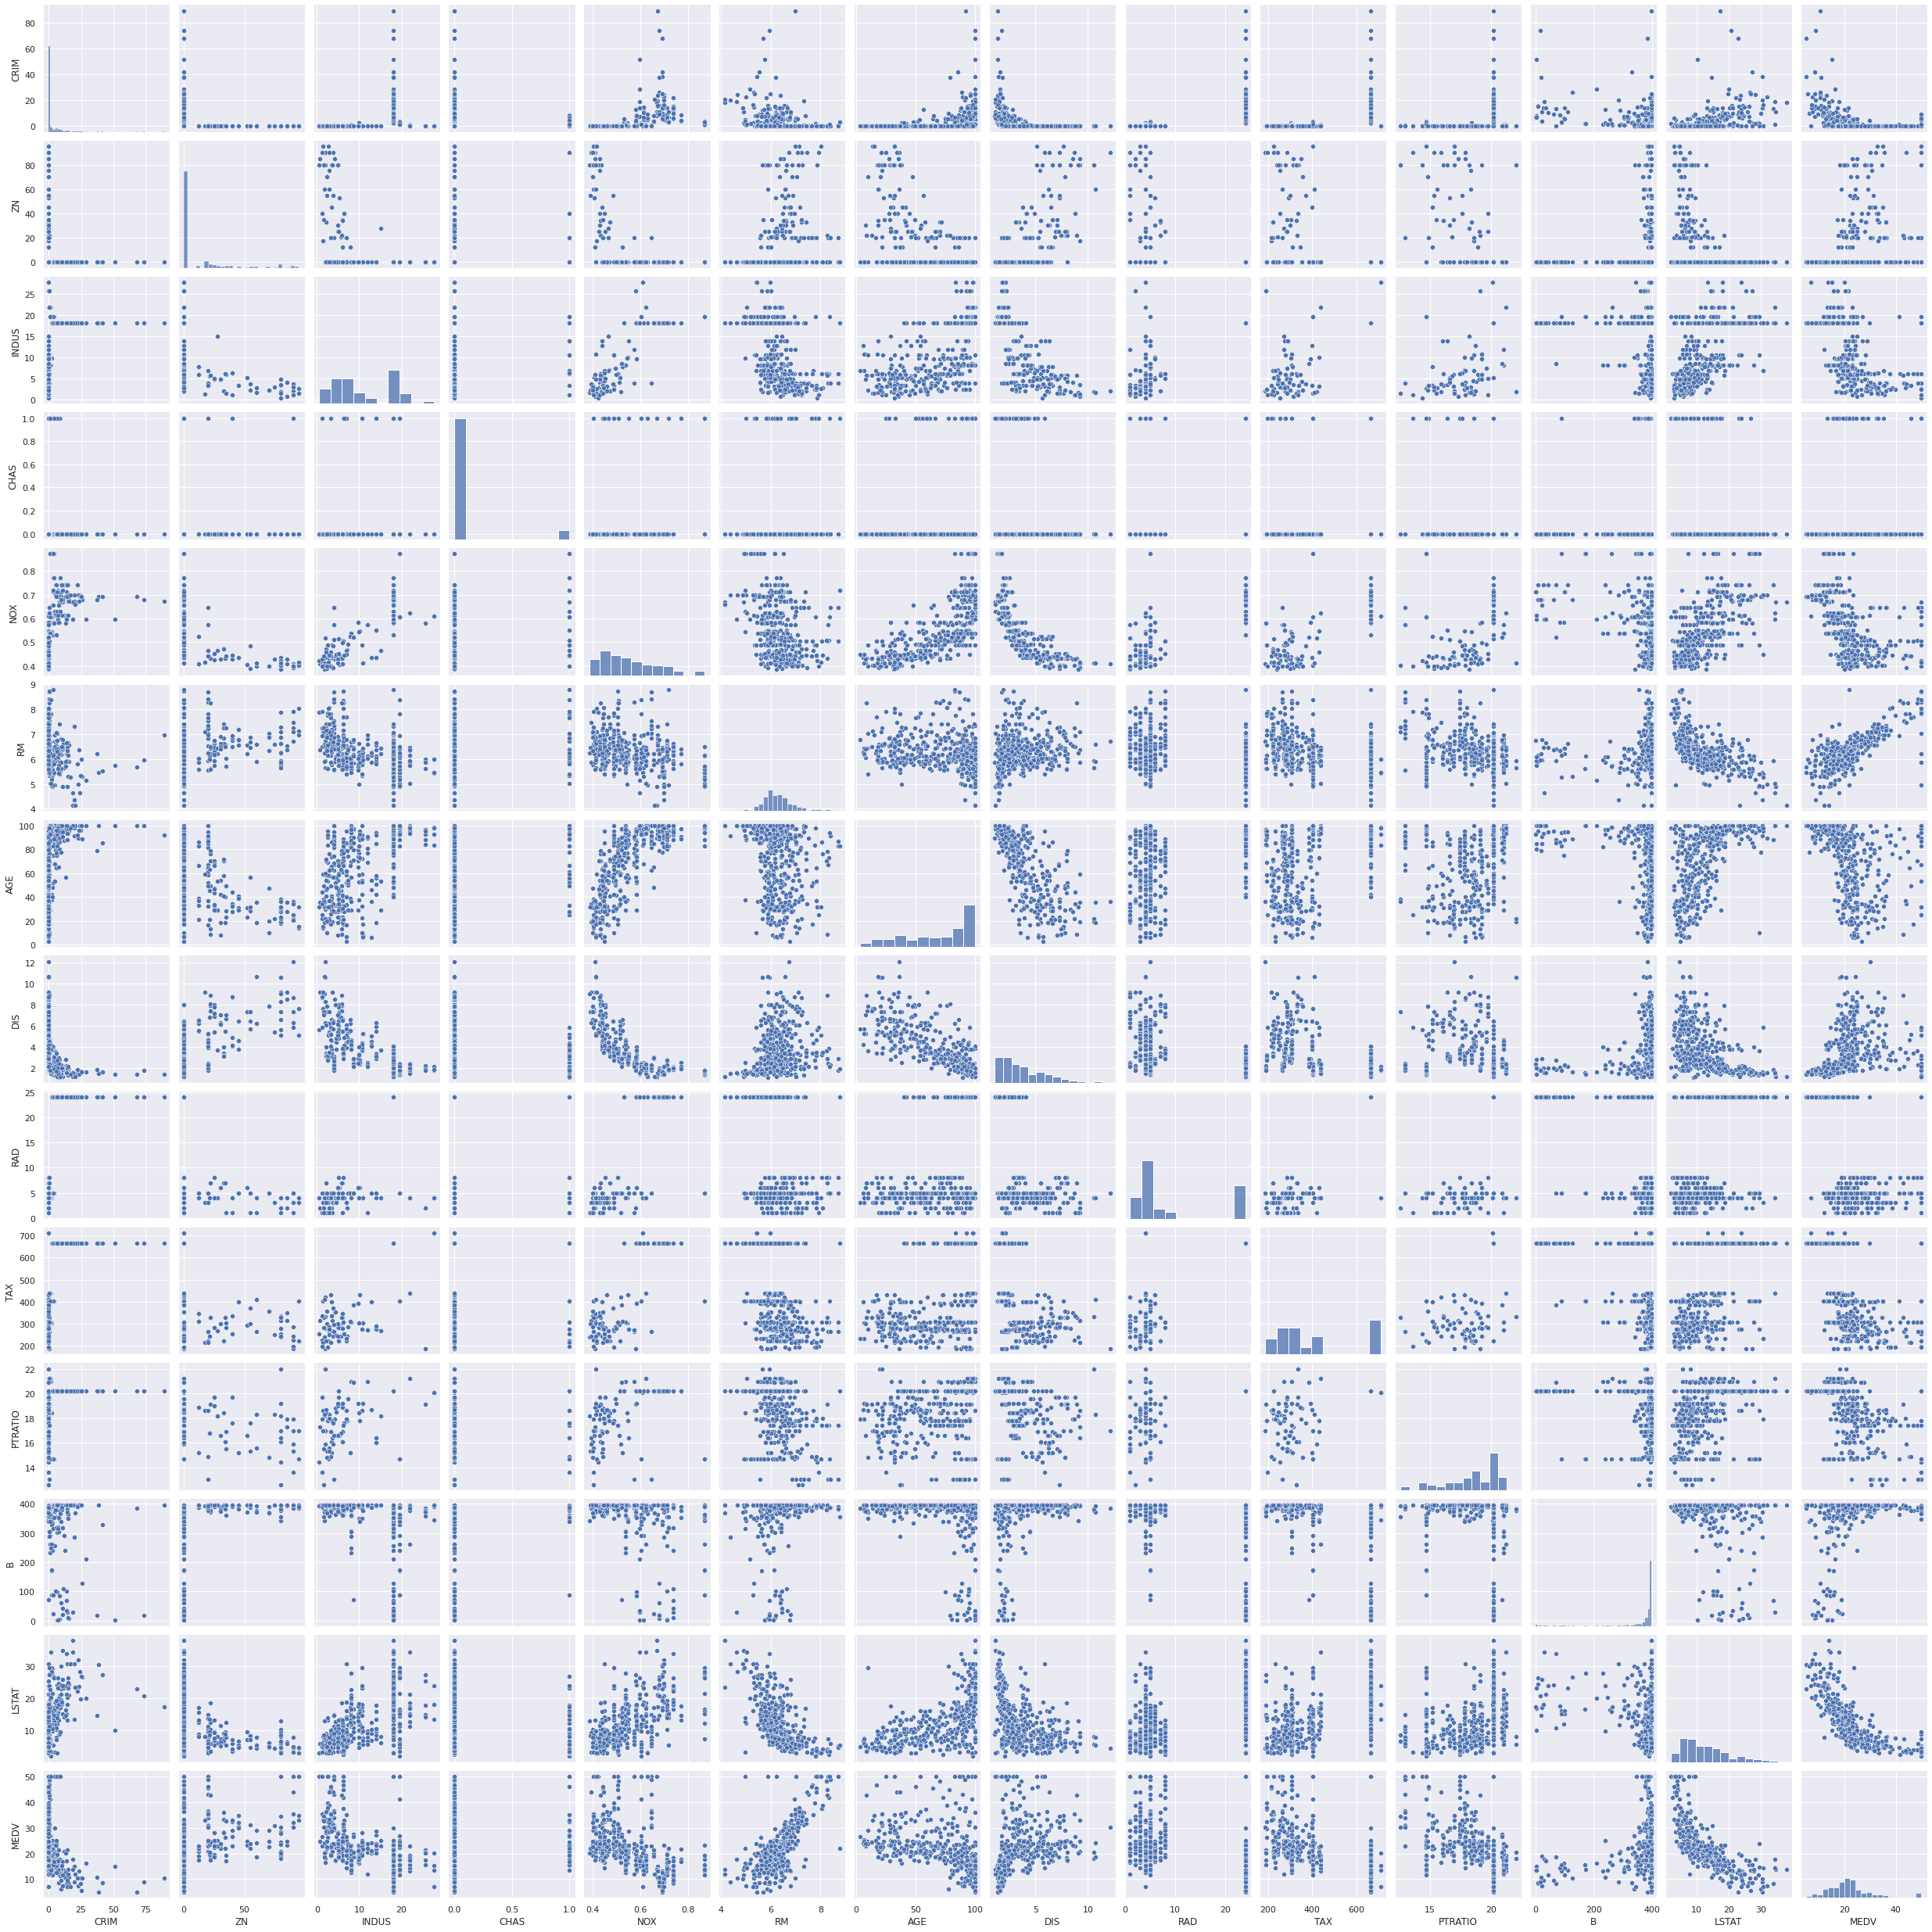

In [97]:
sns.pairplot(boston)

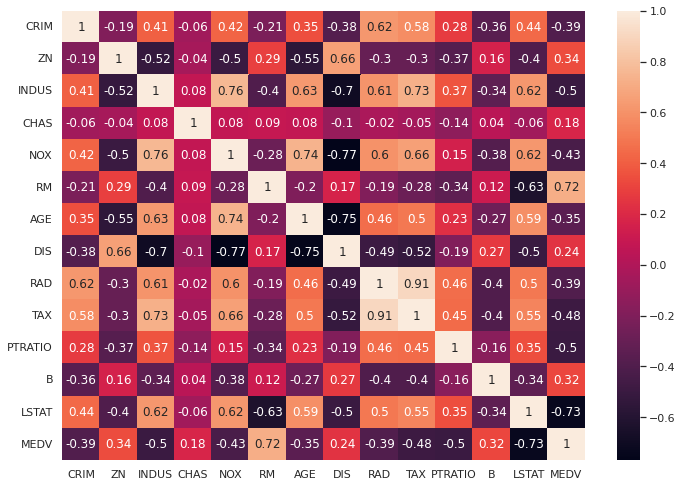

In [98]:
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.


Observations:
To fit a linear regression model, we select those features which have a high correlation with our target variable MEDV. By looking at the correlation matrix we can see that RM has a strong positive correlation with MEDV (0.72) where as LSTAT has a high negative correlation with MEDV(-0.73).
An important point in selecting features for a linear regression model is to check for multi-co-linearity. The features RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. We should not select both these features together for training the model. Check this for an explanation. Same goes for the features DIS and AGE which have a correlation of -0.75.
Based on the above observations we will RM and LSTAT as our features. Using a scatter plot let’s see how these features vary with MEDV.

Observations:
The prices increase as the value of RM increases linearly. There are few outliers and the data seems to be capped at 50.
The MEDV tend to decrease with an increase in LSTAT. Though it doesn’t look to be following exactly a linear line.

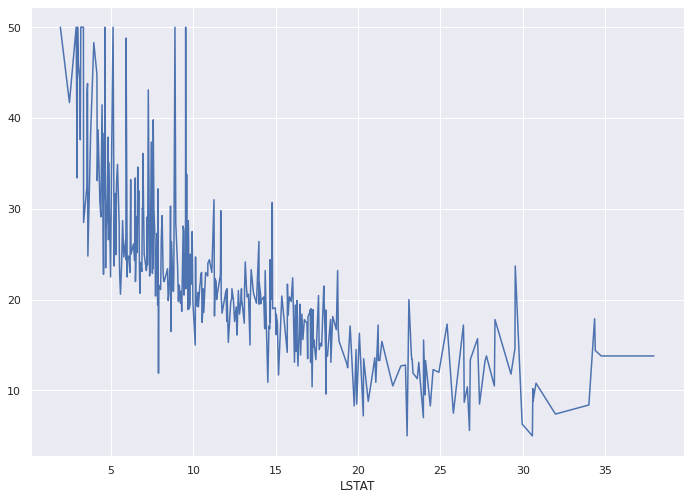

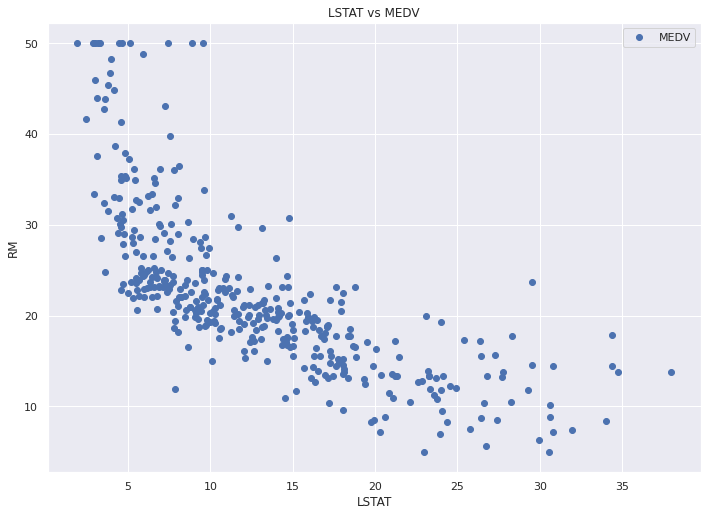

In [99]:
boston.groupby('LSTAT')['MEDV'].mean().plot()
boston.plot(x='LSTAT', y='MEDV', style='o')
plt.title('LSTAT vs MEDV')
plt.xlabel('LSTAT')
plt.ylabel('RM')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


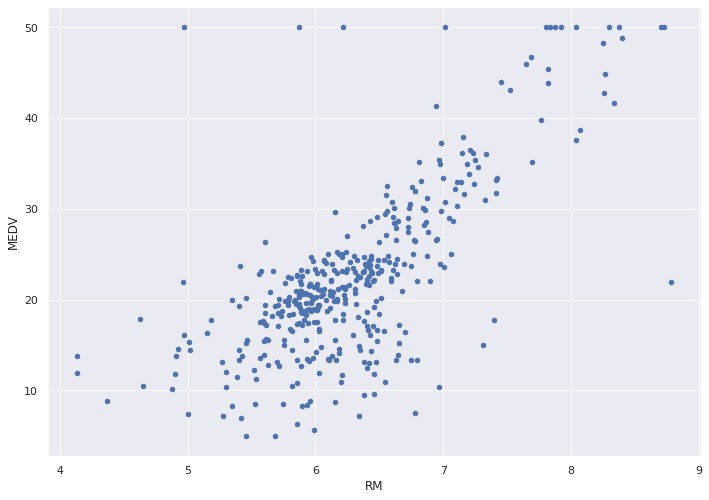

In [100]:
boston.plot.scatter('RM', 'MEDV')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


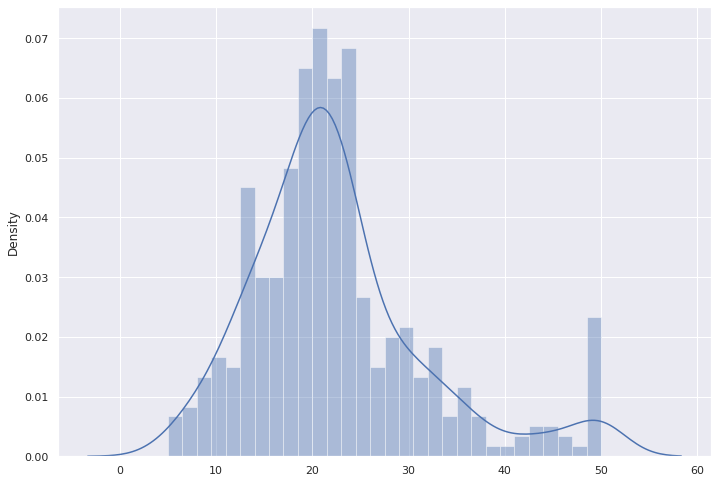

In [101]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(Y, bins=30)
plt.show()

In [102]:
# Input Data
# X = features

# Output Data
# Y = MEDV


# splitting data to training and testing dataset.

#from sklearn.cross_validation import train_test_split
#the submodule cross_validation is renamed and reprecated to model_selection
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.2,
													random_state = 5)

print("xtrain shape : ", X_train.shape)
print("xtest shape : ", X_test.shape)
print("ytrain shape : ", Y_train.shape)
print("ytest shape : ", Y_test.shape)

xtrain shape :  (320, 13)
xtest shape :  (80, 13)
ytrain shape :  (320,)
ytest shape :  (80,)


In [103]:
from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
X_train_scaled = scaler.fit_transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data 

In [116]:
# Fitting Multi Linear regression model to training model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept=True)
regressor.fit(X_train_scaled,Y_train)

# predicting the test set results
Y_pred = regressor.predict(X_test_scaled)

In [105]:
coefficients = pd.DataFrame(regressor.coef_,X1.columns)
coefficients.columns = ['coefficients']
coefficients

,coefficients
CRIM,-0.771451
ZN,0.672850
INDUS,-0.023008
CHAS,0.553986
NOX,-1.926067
RM,3.673791
AGE,-0.177644
DIS,-2.736827
RAD,2.438367
TAX,-2.124076


In [106]:
df1 = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
df1

,Actual,Predicted
0,6.3,12.283117
1,20.1,20.535255
2,32.9,30.631144
3,8.4,6.483983
4,26.6,23.201557
...,...,...
75,37.6,38.546903
76,17.8,16.787558
77,10.4,16.490695
78,17.8,10.149945


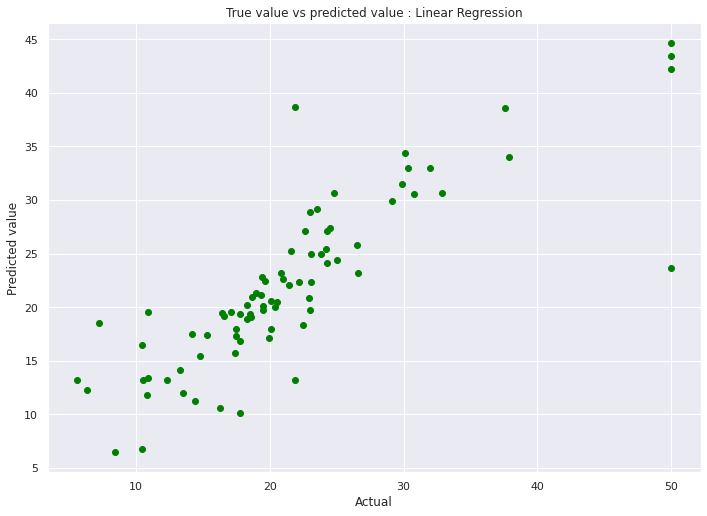

In [107]:
#Plotting Scatter graph to show the prediction
# results - 'ytrue' value vs 'y_pred' value
plt.scatter(Y_test, Y_pred, c = 'green')
plt.xlabel("Actual")
plt.ylabel("Predicted value")
plt.title("True value vs predicted value : Linear Regression")
plt.show()

In [108]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('R2- SCORE:', metrics.r2_score(Y_test,Y_pred))

Mean Absolute Error: 3.2187806343311296
Mean Squared Error: 25.127385152498093
R2- SCORE: 0.7022680338721873


Cross Validation

In [109]:
from sklearn.model_selection import cross_validate
regressor = LinearRegression(normalize = True)

In [110]:
cv_results = cross_validate(regressor, X, Y, cv=10, scoring = "r2" , return_train_score=True)
cv_results['test_score'].mean(), cv_results['train_score'].mean()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

(0.7154626397699431, 0.748754573955177)

In [111]:
testdatasets = pd.read_csv('/content/test.csv')
final_test=testdatasets.drop(columns=['ID'], axis = 1).values #read the dataset

In [112]:
testdatasets 

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0,0.10612,30.0,4.93,0,0.428,6.095,65.1,6.3361,6,300.0,16.6,394.62,12.40
1,1,0.34109,0.0,7.38,0,0.493,6.415,40.1,4.7211,5,287.0,19.6,396.90,6.12
2,2,12.24720,0.0,18.10,0,0.584,5.837,59.7,1.9976,24,666.0,20.2,24.65,15.69
3,3,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311.0,15.2,392.52,20.45
4,4,1.80028,0.0,19.58,0,0.605,5.877,79.2,2.4259,5,403.0,14.7,227.61,12.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,100,0.19073,22.0,5.86,0,0.431,6.718,17.5,7.8265,7,330.0,19.1,393.74,6.56
101,101,6.96215,0.0,18.10,0,0.700,5.713,97.0,1.9265,24,666.0,20.2,394.43,17.11
102,102,0.05360,21.0,5.64,0,0.439,6.511,21.1,6.8147,4,243.0,16.8,396.90,5.28
103,103,0.10469,40.0,6.41,1,0.447,7.267,49.0,4.7872,4,254.0,17.6,389.25,6.05


In [118]:
final_test_scaled = scaler.transform(final_test)


In [119]:
final_y_pred_ = regressor.predict(final_test_scaled) # given the features of the test dataset, it will give the final predictions

final_y_pred_

array([23.76578765, 25.11326066, 15.05659124, 20.63144912, 21.75565671,
       22.55908766, 19.21408407, 22.18346386, 33.63671683, 18.17917536,
       25.34092255, 21.53429723, 20.56452972, 18.90730345, 20.42438501,
       26.7862331 , 17.46411745, 24.83057575, 19.20543328, 21.69347361,
       25.48697934, 37.48506051, 23.28825995,  9.63023487, 14.24408938,
        6.4700915 , 17.18923   , 19.96979166, 23.84568281, 15.36922058,
       37.34360506, 19.18782131, 18.65174754, 18.73086216, 26.33994554,
       20.29893946, 30.89362578, 31.14636658, 39.3907291 , 25.84790155,
       19.2082784 , 30.54409532, 24.64414769, 18.20220754, 21.04484179,
       26.68671368, 20.53305461, 24.40408607, 14.73624103, 13.77502146,
       19.99370822, 33.97780962, 24.40852423, -3.77929548, 13.46400964,
       16.9630069 , 20.26803676, 11.98682424, 10.96036026, 18.58871838,
       20.17362169, 20.30526566, 32.39755517, 24.49240683, 36.19886959,
       32.90733752, 15.5454005 , 21.41967275, 25.55753914, 17.06

In [120]:
df = pd.DataFrame({'MEDV Predicted by linear model':final_y_pred_})
df

,MEDV Predicted by linear model
0,23.765788
1,25.113261
2,15.056591
3,20.631449
4,21.755657
...,...
100,24.873602
101,16.540786
102,27.767235
103,35.498439


In [121]:
output= pd.concat([testdatasets,df],axis=1)
output

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV Predicted by linear model
0,0,0.10612,30.0,4.93,0,0.428,6.095,65.1,6.3361,6,300.0,16.6,394.62,12.40,23.765788
1,1,0.34109,0.0,7.38,0,0.493,6.415,40.1,4.7211,5,287.0,19.6,396.90,6.12,25.113261
2,2,12.24720,0.0,18.10,0,0.584,5.837,59.7,1.9976,24,666.0,20.2,24.65,15.69,15.056591
3,3,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311.0,15.2,392.52,20.45,20.631449
4,4,1.80028,0.0,19.58,0,0.605,5.877,79.2,2.4259,5,403.0,14.7,227.61,12.14,21.755657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,100,0.19073,22.0,5.86,0,0.431,6.718,17.5,7.8265,7,330.0,19.1,393.74,6.56,24.873602
101,101,6.96215,0.0,18.10,0,0.700,5.713,97.0,1.9265,24,666.0,20.2,394.43,17.11,16.540786
102,102,0.05360,21.0,5.64,0,0.439,6.511,21.1,6.8147,4,243.0,16.8,396.90,5.28,27.767235
103,103,0.10469,40.0,6.41,1,0.447,7.267,49.0,4.7872,4,254.0,17.6,389.25,6.05,35.498439


In [122]:
from google.colab import files
output.to_csv('output.csv') 
#files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>